# 데이터 전처리 결과서
**1. 수집한 데이터에 대한 설명**
- 수집 방법 : 사용자의 활동 데이터를 기반으로 수집 됨.
참고 데이터셋: **FitBit Fitness Tracker Data** <br>
출처: https://www.kaggle.com/datasets/arashnic/fitbit/data


- 선정한 Feature 설명
: Kaggle에서 기존 데이터셋을 참고한 후, 모델의 성능 개선을 위해 데이터셋에 임의로 복잡도와 예외값을 넣어 학습시킴.

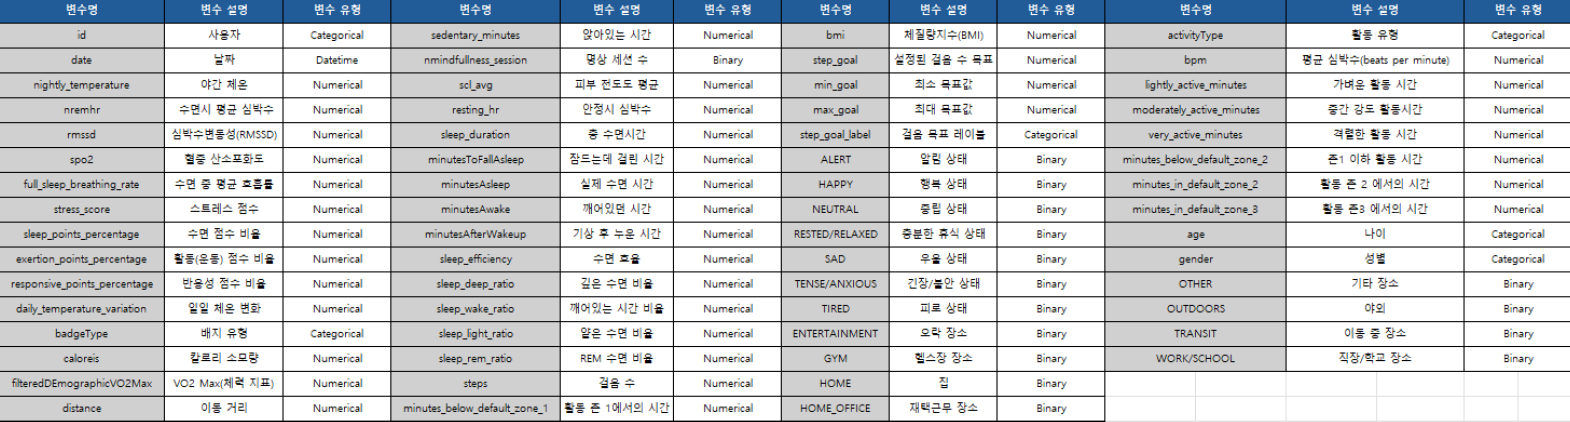


- 이 변수들 사이에서 상관관계(Correlation Heatmap)을 통해 이탈에 영향을 미치는 변수 설정.
-데이터셋에 실제로 존재하는 컬럼 중
    1. **수치형 데이터**
    2. **결측치가 40% 이하인 컬럼**
    3. **상위 15개를 우선으로 자동 추출**
    4. **이 15개 컬럼을 heatmap으로 확인**
    5. **그 중 관계성이 높은 5가지를 선정하여 이탈자 판단 기준으로 활용. <br>**

<img src="https://raw.githubusercontent.com/SKNETWORKS-FAMILY-AICAMP/SKN13-2nd-5TEAM/refs/heads/main/images/15%EA%B0%9C%20%ED%9E%88%ED%8A%B8%EB%A7%B5.png" width="650" 
height="500"/>
<img src="https://raw.githubusercontent.com/SKNETWORKS-FAMILY-AICAMP/SKN13-2nd-5TEAM/refs/heads/main/images/5%EA%B0%9C%20%ED%9E%88%ED%8A%B8%EB%A7%B5.png" width="650" 
height="500"/>

- 이렇게 해서 선정된 변수는<br>

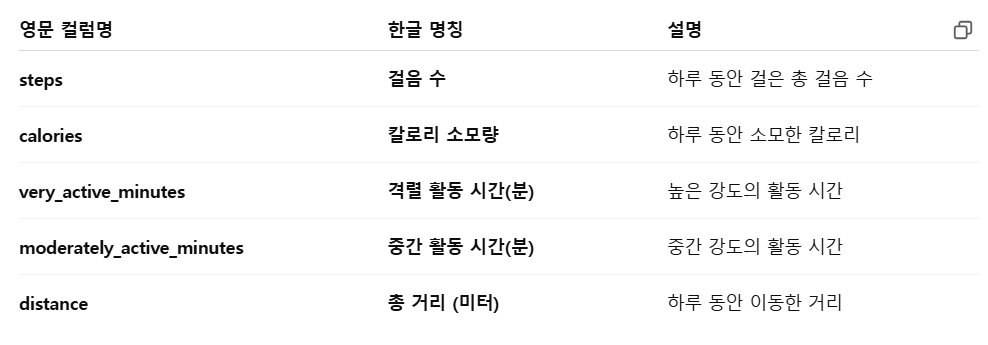

**2. 탐색적 데이터 분석(Exploratory Data Analysis, EDA)** <br>

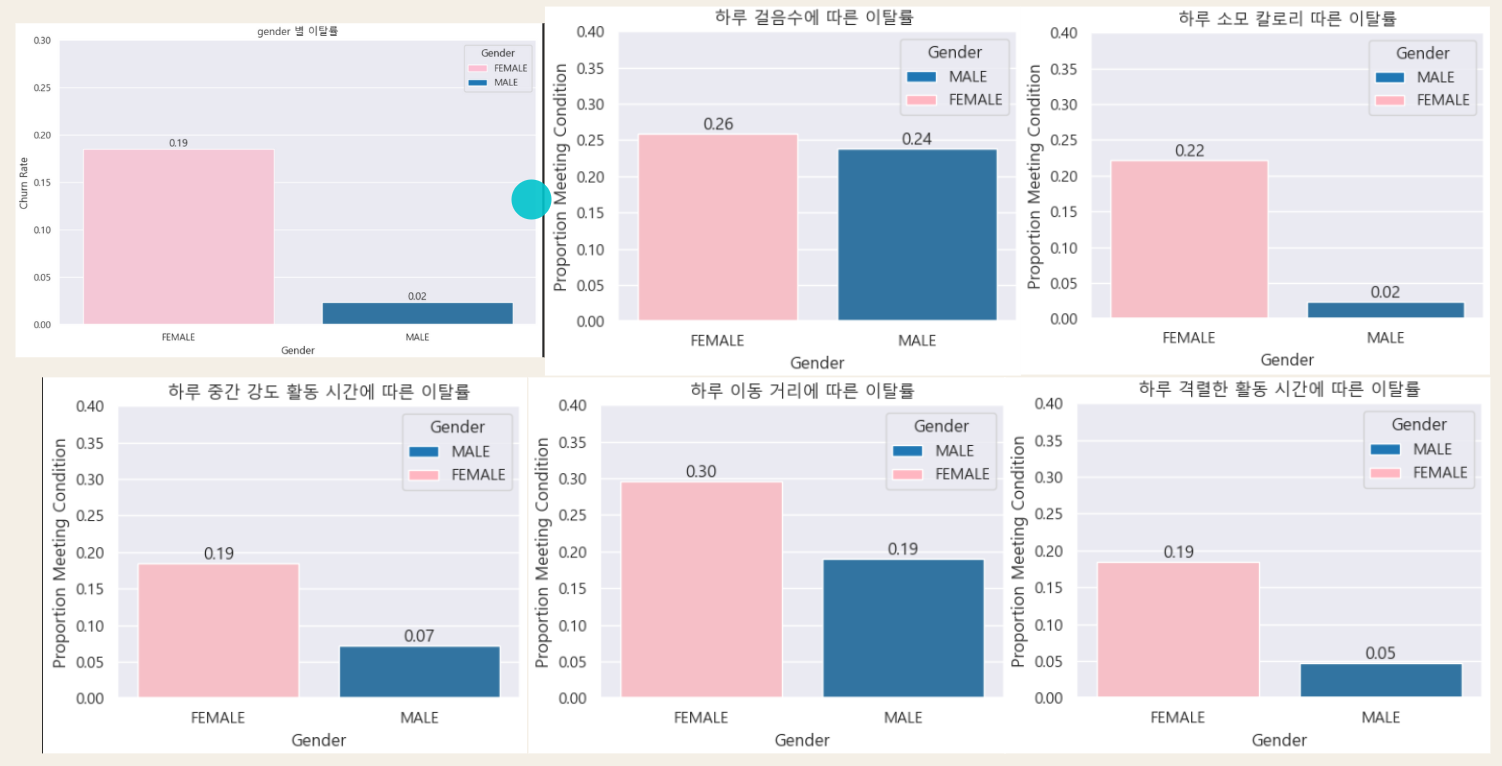 <br>

- 탐색적 데이터 분석을 진행한 결과, 본 프로젝트의 대상이 된 모바일 헬스케어 서비스의 사용자는 여성의 이탈률이 약 18.5%, 남성이 약 3% 정도로 매우 낮음. <br>
즉, 여성 이용자가 남성 이용자에 비해 이탈 가능성이 더 높게 예측.

- 학습 데이터에 대한 탐색적 데이터 분석(Exploratory Data Analysis, EDA) 수행 결과 결측치가 포함된 행이 존재하며, 주요 피처(base_cols) 또는 id에 결측치가 있으면 제거함.

- 사용자별로 그룹화 후 평균값을 산출하여 이상값 영향을 완화시킴.

- 피처별 통계량(평균, 최소/최대값) 등을 통해 사용자 활동 패턴 파악 가능.
 
**3. 결측치 처리 방법 및 이유** <br>

- 처리방법 :dropna() 사용하여 주요 피처 및 id 컬럼에 결측치가 존재하는 행을 제거함.<br>

- 이유 : 이상치 또는 누락된 정보가 많으면 모델 성능 저하 가능성이 크며, 평균 계산에 영향을 줄 수 있기 때문에 제거함. <br>

 
 **3.1 전체 결측치 현황** <br>
- 원본 데이터 전체 기준으로 분석한 결과, 총 236,584개의 셀에 결측치가 존재했으며, 이로 인해 7,410개의 행(사용자 기록)에 하나 이상의 결측값이 포함되어 있는 것으로 확인.
- 이는 전체 데이터의 품질 저하와 분석 신뢰도에 영향을 줄 수 있는 수준의 누락 정보로 판단.


**3.2 이탈률 판단에 필요한 핵심 피처 기준 결측 현황** <br>
- 이탈률을 산정하기 위해 사용한 **주요 활동량 변수 5개(steps, calories, very_active_minutes, moderately_active_minutes, distance)**를 기준으로 보면, 이 중 최소 1개라도 결측치가 포함된 데이터는 2,633개의 사용자 기록에 해당하며, 이 과정에서 6,670개의 셀 값이 누락된 것으로 확인.
- 따라서 이 데이터들은 이탈자 판단에서 제외. <br>

**3.3 전처리 후 이탈률 분석 대상 수** <br>
- 결측치 제거 및 사용자 단위 평균 정제를 거친 후, 최종적으로 71명의 사용자 데이터만이 이탈율 분석에 활용 가능. 이는 완전한 정보를 갖춘 사용자만을 대상으로 분석함으로써 데이터 품질을 보장하기 위한 전처리 결과. <br>

**3.4 결측치 처리 결과** <br>

[전체 기준] 결측치 포함 셀 수: 236584 <br>
[전체 기준] 결측치 포함 행 수: 7410 <br>
[이탈율 판단 기준 피처] 결측치 포함 셀 수: 6670 <br>
[이탈율 판단 기준 피처] 결측치 포함 행 수: 2633 <br>

[이탈율 계산 대상] 전처리 후 남은 사용자 수: 71


**4. 이상치 판정 기준과 처리 방법 및 이유** <br>

- 명시적인 이상치 제거는 수행하지 않았지만, CHURNED 라벨 생성 시 임계값 기준으로 간접적으로 이상적이지 않은 활동 데이터를 평가함.
- ex : steps < 6400, calories < 1800 등은 기준 이하로 판단하여 점수를 부여. 이 기준은 이탈 판단의 기준이자, 활동 저하 패턴을 반영. <br>
 
<img src="https://raw.githubusercontent.com/SKNETWORKS-FAMILY-AICAMP/SKN13-2nd-5TEAM/refs/heads/main/images/%EC%9D%B4%EC%83%81%EC%B9%98boxplot%20.png" width="650" 
height="500"/>
<img src="https://raw.githubusercontent.com/SKNETWORKS-FAMILY-AICAMP/SKN13-2nd-5TEAM/refs/heads/main/images/%ED%95%AD%EB%AA%A9%EB%B3%84%20%EC%9D%B4%EC%83%81%EC%B9%98.png" width="650" 
height="500"/>





**비이탈자(CHURNED=0)**는 평균 **10000보 이상**, **30분 이상**의 활동 기록을 확인할 수 있지만, <br>
**이탈자(CHURNED=1)**는 평균 **6500보 미만**, **0~5분**의 활동이 기록되는 것으로 보아 활동량이 낮을수록 이탈율이 크다는 것을 알 수 있음.

- 본 분석에서는 이상치를 명시적으로 제거하지 않았으나, 활동량이 현저히 낮은 사용자를 이탈자로 분류하는 방식으로 비정상적 행동을 간접적으로 걸러내는 기준을 적용. <br>
- 결과적으로 6명은 활동 패턴이 정상적이지 않다고 판단되어 제거(이탈자 처리)되었으며, **65명**의 사용자만이 정제된 **최종 분석 대상**으로 남음. <br>

[**이탈자 판단**] 조건에 따라 이탈자(CHURNED=1)로 분류된 사용자 수: **6** <br>
[**정제된 데이터**] 이탈자로 간주되지 않은 사용자 수: **65**

**4. 적용한 Feature Engineering 방식**

- 1. **사용자 단위 평균 집계** <br>
본 데이터는 일별 측정된 다차원 활동 데이터가 포함되어 있음.
이를 사용자 단위로 그룹화하여 평균값을 산출, 각 사용자를 1개의 row로 요약. <br>
*ex*: steps, calories, distance, sleep_efficiency 등의 일별 평균값 계산. <br>

- 2. **결측치 처리** <br>
모든 수치형 피처에 대해 전체 평균값을 사용하여 결측치를 보완. <br>
→ `df_user.fillna(df_user.mean(), inplace=True)` 방식 적용 <br>

- 3. **이진화(Binarization)** <br>
HOME_OFFICE 컬럼은 이진 피처로 변환하여 사용 여부를 0/1 형태로 표현함. <br>
→ 모델이 명확한 조건으로 판단할 수 있도록 도움

- 4. **파생 피처 생성**
    - daily_temperature_variation: 온도 변화량 기반 파생
    - activity_bouts: 활동 횟수 계산
    - min_goal / max_goal: 사용자가 설정한 최소/최대 목표값을 대표 변수로 요약 <br>
    → 원본 데이터를 더 풍부하게 표현하기 위한 특성 설계 <br>

- 5. **타겟 라벨 생성 (Churn)** <br>
최근 일정 기간 동안 활동이 없는 사용자를 '이탈자(churn)'로 정의하여 타겟 값을 생성함. <br>
*ex*: 마지막 활동일 기준 3일 이상 미접속한 경우 **churn = 1** <br>

- 6. **불균형 변수 제거** <br>
시각화를 통해 분포가 한쪽에 극단적으로 치우친 피처를 제거. <br>
특히 min_goal, max_goal과 같이 특정 범위에서만 값이 집중된 변수는 예측 편향을 유발하므로 제외했습니다. <br>

- 7. **클래스 불균형 보정 (SMOTE)** <br>
이탈자와 잔류자 간 비율 불균형 문제를 해결하기 위해 SMOTE(Synthetic Minority Over-sampling Technique)를 적용. <br>
→ 소수 클래스인 이탈자의 데이터를 증강하여 학습 안정성 확보 <br>

- 8. **피처 분포 기반 시각화 및 판단**
각 피처의 분포를 시각화하고 Broken Y-axis 그래프를 통해 평균값 차이를 분석. <br>
이를통해 실제로 예측 기여도가 낮거나 왜곡 가능성이 높은 피처들을 사전에 선별하여 제거함.

- 9. **집계 기반 Feature 생성**:<br> 동일한 사용자 ID별로 데이터를 평균 처리하여 사용자 단위 대표값으로 변환함. <br>

- 10. **라벨링 엔지니어링**: <br>건강 활동 수준이 낮은 사용자에게 점수를 부여하고, 총 점수가 4점 이상인 경우 CHURNED=1로 설정하여 분류 문제로 전환함.
추가적으로 입력 변수 X, 목표 변수 y로 분리.